# Imports

In [23]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

# Pure python function

In [24]:
def solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1),int(.5/dx):int(1/dx + 1)] = 2 
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j])
                u[i,j] = u[i,j] + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
    return 0    

# Numba accelerator

In [25]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1),int(.5/dx):int(1/dx + 1)] = 2 
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j])
                u[i,j] = u[i,j] + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
    return 0    

# Pyccel accelerator

In [26]:
@types('float[:,:]', 'float[:,:]', 'int', 'float', 'float','float','float')
def solve_2d_diff_pyccel(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1),int(.5/dx):int(1/dx + 1)] = 2 
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j])
                u[i,j] = u[i,j] + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
    return 0    

# Inputs

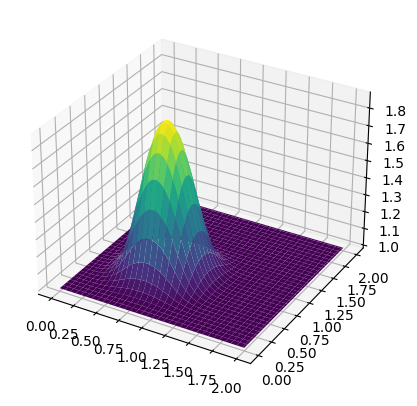

In [27]:
###variable declarations
nt = 100
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))
    

solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

# Call Functions

# Pure function

In [28]:
%timeit solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

1 loop, best of 3: 2.98 s per loop


# Function with numba accelerator

In [29]:
%timeit solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu)

The slowest run took 126.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 4.77 ms per loop


# Function with pyccel accelerator

In [30]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

In [31]:
%timeit solve_2d_diff_f90(u, un, nt, dt, dx, dy, nu)

The slowest run took 11.90 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.94 ms per loop
